# Section 1: One-Shot Learning Introduction


### Machine Learning: Parametrics vs. Non-Parametric

- **Parametric**: 
  - Adapt the parameters via an algorithm.
    - Logistic Regression, Support Vector Machines, Neural Networks 

- **Non-Parametrics**:
  - Learning is done by memorization (storing data), some dimensionality reduction
    - k-NN & Decision Trees



### Pre-requisites for One-shot Learning

- Previously trained filters 
- Pre-determined architectures 
- Definite taxonomy for the data stored / collected


### Types of One-shot Learning
- Data augmentation
- Model
- Metrics
- Optimization
- Generative modeling

In [2]:

import numpy as np 

# the datasets we'll be using 
from sklearn import datasets

# model 
from sklearn.neighbors import KNeighborsClassifier

# split data and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# metrics 
from sklearn.metrics import confusion_matrix, accuracy_score

# MLP
from sklearn.neural_network import MLPClassifier

# plotting
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
# figure size
rcParams['figure.figsize'] = 20,8

In [3]:
# importing the dataset 
data = datasets.load_iris()
X = data.data
Y = data.target

In [4]:
# Constants 

# number of neighbours
N_NEIGHBOURS = 3
# test size 
TEST_SIZE = 0.20
# names of the classes
class_names = ['Setosa','Versicolour','Virginica']

In [ ]:
# looking at a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title("Scatter Plot Between Class 0 & 1")
plt.show()

In [6]:
# let's split the data 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=TEST_SIZE,
                                                    random_state=42)

In [ ]:
# instantiate the classifier 
knn = KNeighborsClassifier(N_NEIGHBOURS)

# lets fit it to the data 
knn.fit(X_train, y_train)

# predict 
y_pred = knn.predict(X_test)

# lets look at the results 
acc = accuracy_score(y_test, y_pred)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)

print(acc)
sns.heatmap(cm, annot=True)
plt.show()

In [51]:
def test_model(model, data,datacol,
               targetcol,
               test_size,
               random_state, title,visualize=True,return_stats=True):
  """ split and test model. shows confusion matrix

  returns predictions and confusion matrix for a given model and data. 

  Assumes the data is a pandas.DataFrame.

  params:
  model:type: sklearn model: a given model that has a fit & predict method
  data:type: pandas.DataFrame: dataframe with the X & Y values. 
  datacol:type:str: name of the column with the features
  targetcol:type:str: name of the target column
  random_state:type:int: seed 
  title:type:str: title of the graph to show 
  visualize:type:bool: To show the plot or not
  return_stats:type:bool: whether to print the accuracy & confusion_matrix
  
  returns
  y_pred:type:array: predictions of the model 
  acc:type:int:      accuracy of the model (in %)
  cm:type:nd-array:    confusion matrix of the model
  """
  # separate
  X = data[datacol]
  Y = data[targetcol]
  # split the data
  X_train, X_test, y_train, y_test = train_test_split(X,
                                                      Y,
                                                      test_size=test_size,
                                                      random_state=random_state)
  # fit the model 
  model.fit(X_train, y_train)
  # predict 
  y_pred = model.predict(X_test)
  # get the metrics
  acc = accuracy_score(y_test, y_pred) * 100 # percentage
  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # show plot 
  if visualize: 
    g = sns.heatmap(cm, annot=True)
    g.set_title(title)
    plt.show()
  
  if return_stats:
    print(f"The accuracy of the model is: {acc}")
    print(cm)
  
  return y_pred, acc, cm



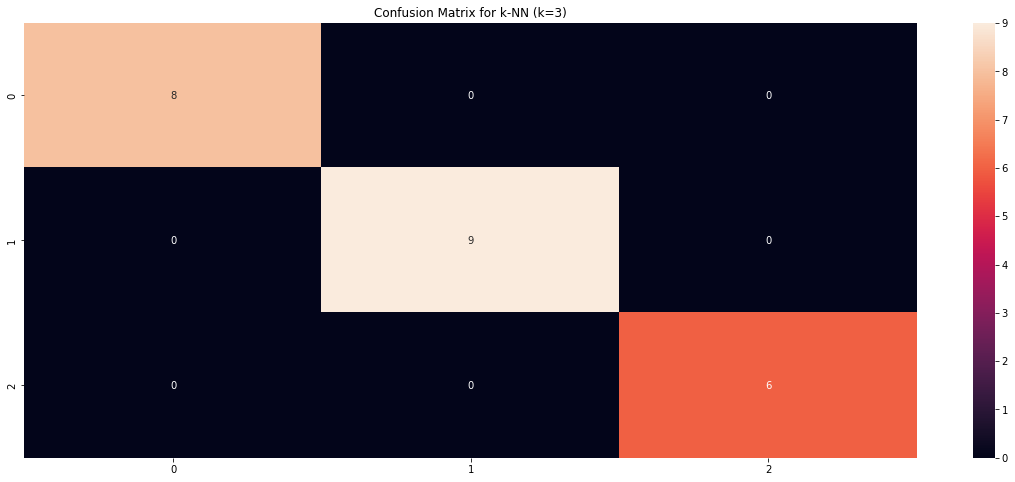

The accuracy of the model is: 100.0
[[8 0 0]
 [0 9 0]
 [0 0 6]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


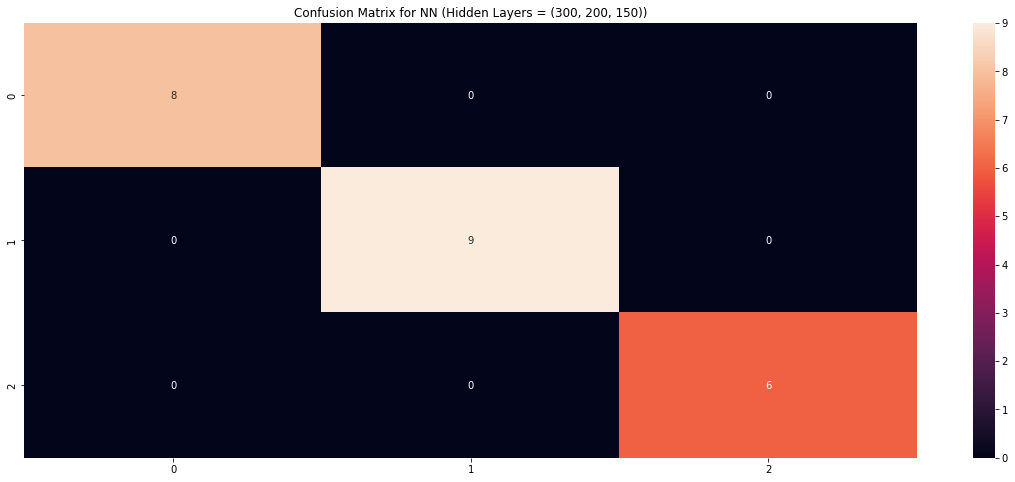

The accuracy of the model is: 100.0
[[8 0 0]
 [0 9 0]
 [0 0 6]]


In [56]:
# Whole section one with a good function to summarize it all

# load the given data 
# return it as a dataframe
data = datasets.load_iris(as_frame=True)
# our initial data
X = data['data']
Y = data['target']

# instantiate the model with the given constants

# number of neighbors
N_NEIGHBORS = 3
# Number of hidden layers 
HIDDEN_LAYERS = (300, 200, 150)
# max iterations 
MAX_ITER = 30
# the test size 
TEST_SIZE = 0.15
# seed 
SEED = 42
# knn 
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)

# MulitLayerPerceptron
mlp = MLPClassifier(hidden_layer_sizes=HIDDEN_LAYERS, 
                    max_iter=MAX_ITER)
# testing model 1 
title = f"Confusion Matrix for k-NN (k={N_NEIGHBORS})"
y_pred, acc, cm = test_model(knn,
                            data,
                            'data',
                            'target',
                            TEST_SIZE,
                            SEED,
                            title,
                            visualize=True,
                            return_stats=True)

# testing model 2
title_2 = f"Confusion Matrix for NN (Hidden Layers = {HIDDEN_LAYERS})"
y_pred_2, acc_2, cm_2 = test_model(mlp,
                                  data,
                                  'data',
                                  'target',
                                  TEST_SIZE,
                                  SEED,
                                  title_2,
                                  visualize=True,
                                  return_stats=True)

